Geometric Brownian motion (GBM), a stochastic differential equation, can be used to model phenomena that are
subject to fluctuation and exhibit long-term trends, such as stock prices and the market value of goods. The model
uses two parameters, the rate of drift from previous values and volatility, to describe and predict how the continuous time stochastic process evolves over time$[1]$.

The following code generates a stochastic simulation and plots corresponding to the Geometric Brownian Motion Model as given by the following differential equation:

$$\Delta S = \mu S \Delta t + \sigma S \Delta z,$$


The process is geometric because the trend and volatility terms are proportional to
the current value of S. This is typically the case for stock prices, for which rates of return
appear to be more stationary than raw dollar returns, $\Delta S$ $[2]$.

$[1]$ Croghan, Jakob; Jackman, John K.; and Min, K. Jo, "Estimation of Geometric Brownian Motion Parameters
for Oil Price Analysis" (2017). Industrial and Manufacturing Systems Engineering Conference Proceedings
and Posters. 193. 

$[2]$ Jorion, Philippe. Financial Risk Manager Handbook. Second. Hoboken: John WIley & Sons, Inc., 2003. ebook. 5 June 2020.


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [133]:
#number of historical samples
x = 300
#forcast period, number of trading days in a year
t = 252
#number of iterations (days to forcast)
it = 100
#number of simulations
sim = 3000

In [119]:
#import wti price data from yfinance package
wti = yf.download('CL=F')

#estimate GBM parameters based on conference paper technique 1
wti['drift_param'] = wti['Close'].pct_change()
drift = wti.drift_param.iloc[-x:].sum() / x
wti['vol_param'] = (wti.drift_param - drift) ** 2
sigma = np.sqrt((1/(x-1)) * wti.vol_param.iloc[-x:].sum())

#display dataframe
wti

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,drift_param,vol_param
Date,,,,,,,,
2000-03-22,27.650000,28.250000,27.250000,27.459999,27.459999,92302,NaN,NaN
2000-03-23,27.650000,27.780001,27.160000,27.309999,27.309999,79373,-0.005462,0.000110
2000-03-24,27.850000,28.150000,27.549999,27.980000,27.980000,55693,0.024533,0.001638
2000-03-27,27.650000,28.020000,27.410000,27.730000,27.730000,59199,-0.008935,0.000049
2000-03-28,27.600000,27.870001,27.000000,27.080000,27.080000,39487,-0.023440,0.000056
...,...,...,...,...,...,...,...,...
2020-06-01,35.310001,35.750000,34.270000,35.459999,35.459999,172722029,0.004533,0.000419
2020-06-02,35.700001,37.380001,35.549999,37.259998,37.259998,138842394,0.050761,0.004450
2020-06-03,37.549999,38.180000,35.880001,36.910000,36.910000,215830430,-0.009393,0.000043


In [120]:
#check drift and volatility parameters
drift, sigma

(-0.0159432474468466, 0.26697862189540567)

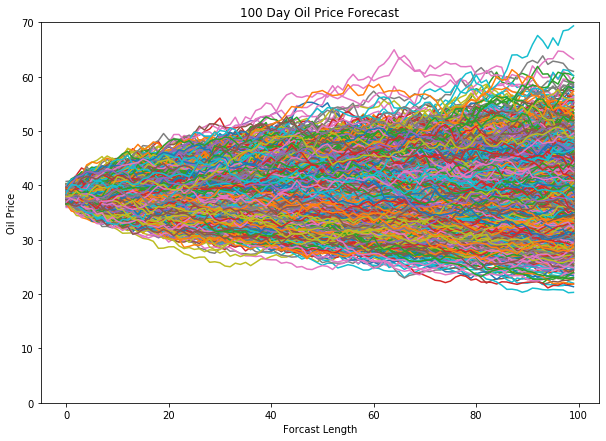

In [139]:
#create pricing function to be run during the simulation
def GBM_model(mu, sig):
    dt = 1 / t
    s = wti['Close'].iloc[-1] #since GBM is a markov process, we start with the last day's pricing
    
    hist = []
    i = 0
    while i < it: # number of iterations
        e = np.random.standard_normal() #e is the only random variable in the equation
        ds = s * (mu * dt + sig * np.sqrt(dt) * e) #pricing formula AKA GMB formula
        hist.append(ds + s)
        s += ds
        i += 1
    
    plt.plot(range(0, it), hist) #create a new line in the loop so we can see all our simulations
    return hist[it - 1]

fig, ax = plt.subplots(figsize = (10,7))

#run simulation
x = 0
view = []
while x < sim:
    view.append(GBM_model(drift, sigma))
    x += 1
    
#labeling graph    
# ax.set_xlim([0, it + 20])   
ax.set_ylim([0, 70])

plt.ylabel('Oil Price')
plt.xlabel('Forcast Length')
plt.title('{} Day Oil Price Forecast'.format(it))
plt.show()

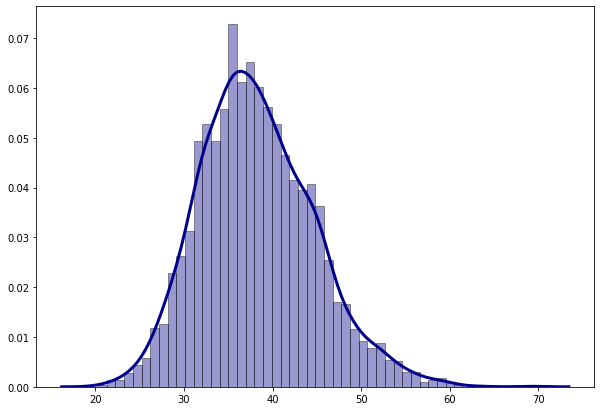

In [140]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,7))

sns.distplot(view, hist=True, kde=True, 
             bins = 50, color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 3})

plt.show()